In [1]:
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import cifar10

## Standard BOW Pipeline For Computer Visison

### Some Information about Dataset

In [2]:
(trainImages, trainLabels), (testImages, testLabels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(f"Whole Train Data Image shape = {trainImages.shape}")
print(f"Single Train Image shape = {trainImages[0].shape}")
print(f"Labels  = {set(trainLabels.ravel())}")
print(f"Train Data Size = {trainImages.shape[0]}")
print(f"Test Data Size = {testImages.shape[0]}")

Whole Train Data Image shape = (50000, 32, 32, 3)
Single Train Image shape = (32, 32, 3)
Labels  = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Train Data Size = 50000
Test Data Size = 10000


In [4]:
labelsMap = {0:	"airplane",
1	: "automobile",
2	: "bird",
3	: "cat",
4	: "deer",
5	: "dog",
6	: "frog",
7	: "horse",
8	: "ship",
9	: "truck"}

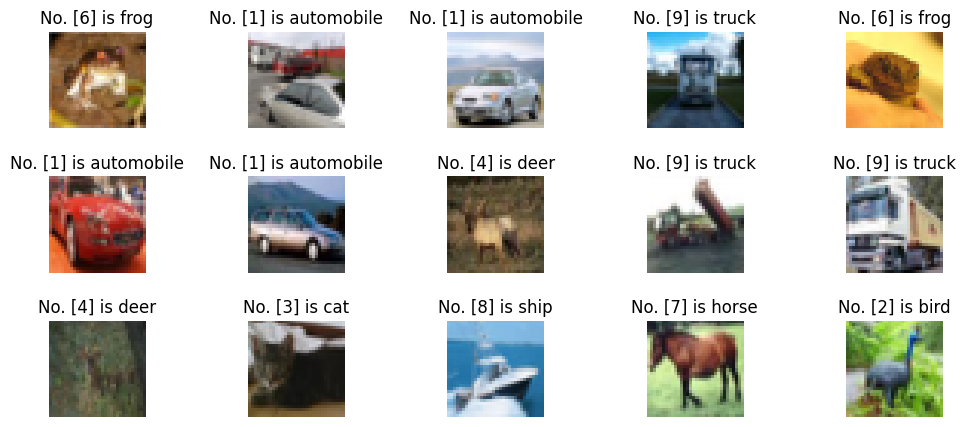

In [5]:
rows = 3
colums = 5
f, ax = plt.subplots(rows, colums, figsize=(12, 5), gridspec_kw={'wspace':0.5, 'hspace':0.5}, squeeze=True)

for r in range(rows):
  for c in range(colums):
    image_ind = r * 5 - c
    ax[r,c].axis("off")
    ax[r,c].imshow(trainImages[image_ind], cmap='gray')
    ax[r,c].set_title(f"No. {trainLabels[image_ind]} is {labelsMap[trainLabels.ravel()[image_ind]]}")
plt.show()


## Standard Bag Of Words Pipeline

## Dictionary Learning

In [ ]:
def prepareImage(imageRaw):
    # Convert Images to Grayscale
    images = ...
    return images

In [ ]:
def extractFeatures(images):
    features = []
    sift = ...

    for img in tqdm(images):
        keypoints, descriptors = ...
        # check if decriptors are not null
        if descriptors ... :
          features.extend(descriptors)
    return np.array(features)

In [6]:
def buildVisualDictionary(features, dictionary_size):
    # Create kmean cluster using dictionary_size as n_clusters
    kmeans = ...
    # fit the model
    ...
    # assign kmean centroids to visual_words
    visual_words = ...
    return visual_words

100%|██████████| 50000/50000 [01:27<00:00, 573.77it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
images = prepareImage(trainImages)
features = extractFeatures(images)
dictionary_size = 100
visual_dictionary = buildVisualDictionary(features, dictionary_size)

100%|██████████| 50000/50000 [01:23<00:00, 600.96it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


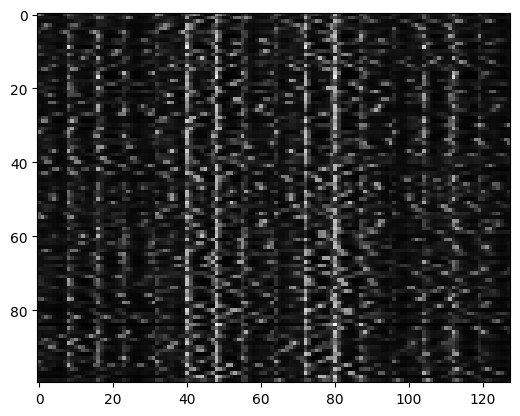

In [50]:
plt.imshow(visual_dictionary,cmap = "gray")

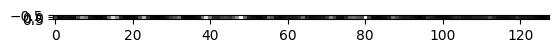

In [51]:
plt.imshow(visual_dictionary[5].reshape((1,128)),cmap="gray")

(array([77., 23.,  8.,  3.,  4.,  4.,  4.,  0.,  4.,  1.]),
 array([  1.98454666,  15.73304176,  29.48153687,  43.23003387,
         56.97852707,  70.72702026,  84.47551727,  98.22401428,
        111.97250366, 125.72100067, 139.46949768]),
 <BarContainer object of 10 artists>)

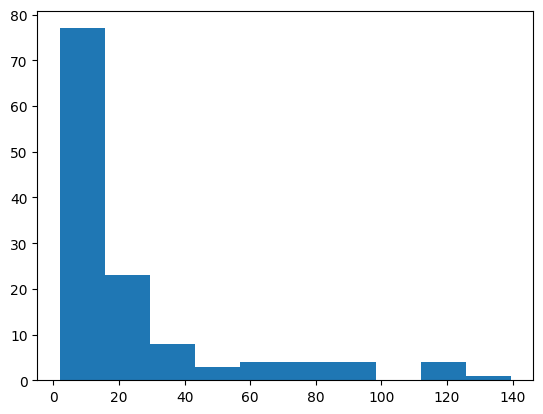

In [52]:
plt.hist(visual_dictionary[44])

## Encode

In [53]:
def encode_images(images,labels, visual_dictionary):
    bow_vectors = []
    encodedLabel = []
    sift = cv2.SIFT_create()

    for i in tqdm(range(len(images))):
        # Detect keypoints and compute descriptors using the SIFT detector
        ...
        # Check if descriptors are not null
        if ...:
          # intialize a zero vector to carry features
            bow_vector = ...

            # For each descriptor in the image, find the closest visual word in the dictionary
            for d in descriptors:
                # Find the index of the closest visual word use norm to get shortest distance
                idx = ...
                # Increment the corresponding bin in the BoW vector
                bow_vector[idx]...

            # Append the BoW vector for the current image to the list as well as labels
            bow_vectors.append(bow_vector)
            encodedLabel.append(labels[i])

    return np.array(bow_vectors),np.array(encodedLabel)

100%|██████████| 50000/50000 [02:20<00:00, 355.11it/s]


In [ ]:
encoded_images,encodedLabel = encode_images(images,trainLabels, visual_dictionary)

## Classify

In [24]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [46]:
# Create an XGBoost classifier
xg_classifier = ...
# fit the model
...

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:22:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scoring" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=10,
              num_parallel_tree=None, ...)

In [1]:
# get training score
...

### Predict on Testing Data

In [33]:
# use functions to get test data prepared
tImages = ...
# encode Images
encoded_tImages,encodedLabels = ...
# get prediction from xgb
predictions = ...   
accuracy = ...
print(f"Accuracy: {accuracy}")

100%|██████████| 10000/10000 [00:21<00:00, 465.55it/s]


Accuracy: 0.2570598838373723
